In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import random
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn
%matplotlib inline

In [2]:
# Read the data into dataframe
df = pd.read_csv('OBU_fakedata.csv')
df

,CMFCUS1_VIP_CODE,CMFCUS1_BUSINESS_FLAG,CMFCUS1_NOTAX_FLAG,CMFCUS1_FINANCIAL_ACT,DP_FG,LN_FG,IX_FG,BD_FG,FD_FG,WM_FG,...,CMFCUS1_PURPOSE,CMFCUS1_DERIVATIVE,CMFCUS1_TITLE_CODE,CUST_TYP,LN_TYP,CONFIRM_TYPE,CORP_TYPE,CMFCUS25_BRANCH,CMFCUS25_FORE_CASH_FLAG,SAR_ALERT
0,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,D,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
1,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
2,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,v,...,5,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
3,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,E,NaN,NaN,1Z,0.0,1.0,Z,0.0,NaN,N
4,N,Y,N,Y,v,NaN,v,NaN,NaN,NaN,...,E,NaN,NaN,1Z,0.0,1.0,NaN,0.0,NaN,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,E,NaN,NaN,1Z,0.0,3.0,Z,NaN,NaN,N
80128,N,Y,N,NaN,v,NaN,NaN,NaN,NaN,NaN,...,1,NaN,NaN,1Z,2.0,NaN,NaN,0.0,NaN,N
80129,N,Y,N,Y,v,v,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,5Z,0.0,1.0,NaN,NaN,NaN,N
80130,N,Y,N,Y,v,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,1Z,0.0,NaN,Z,0.0,NaN,N


In [3]:
print(df.columns)

Index(['CMFCUS1_VIP_CODE', 'CMFCUS1_BUSINESS_FLAG', 'CMFCUS1_NOTAX_FLAG',
       'CMFCUS1_FINANCIAL_ACT', 'DP_FG', 'LN_FG', 'IX_FG', 'BD_FG', 'FD_FG',
       'WM_FG', 'TR_FG', 'EB_FG', 'CD_FG', 'OT_FG', 'TRUST_YN', 'CONFIRM_YN',
       'COMPLEX_CS_FG', 'AUTHORIZED', 'BEARER_SHARE', 'ISSUE_BEARER',
       'SOLE_CORP', 'TRUST_HOLDER', 'CDD_STATUS', 'CUST_PANA', 'CUST_THIRD',
       'CUST_ADVRS', 'CUST_BAHA', 'CUST_PARA', 'CMFCUS25_AE_TYPE',
       'CMFCUS25_FOREIGN_COMPANY', 'CMFCUS25_FOREIGN_ENTITY',
       'CMFCUS25_CERTI_FLAG', 'CMFCUS25_TAXFREE_FLAG',
       'CMFCUS25_CREATIVE_FLAG', 'CMFCUS25_OSU_FLAG', 'CMFCUS25_PUBLIC_CMPY',
       'CMFCUS1_ADR_CNT', 'CMFCUS1_MPHONE_CNT', 'CMFCUS1_OPHONE_CNT',
       'PEP_COUNT', 'REL_ADVRS_COUNT', 'REL_PEPS_COUNT',
       'CMFCUS1_BUSINESS_CODE', 'RISK_LEVEL', 'AMT_RANGE', 'OBU_ANNUAL_INCOME',
       'JOB_RISK', 'CMFCUS25_SP_RATING', 'CMFCUS25_MOODYS_RATING',
       'CMFCUS25_SRT_SP_RATING', 'CMFCUS25_SRT_MOODYS_RATING',
       'CMFCUS25_SRT_FITC

In [4]:
# After the preprocessing
df = pd.read_csv("0416_CRR_df.csv")
df = df.drop(df.columns[0], axis=1)
df = df.drop(columns='NA count', axis=1)
df

,CONFIRM_YN_NA,CONFIRM_YN_Y,COMPLEX_CS_FG_NA,COMPLEX_CS_FG_Y,AUTHORIZED_NA,AUTHORIZED_Y,BEARER_SHARE_NA,BEARER_SHARE_Y,ISSUE_BEARER_NA,ISSUE_BEARER_Y,...,REL_PEPS_COUNT,CMFCUS1_BUSINESS_CODE,RISK_LEVEL,JOB_RISK,CMFCUS25_SP_RATING,CMFCUS25_MOODYS_RATING,CMFCUS25_SRT_SP_RATING,CMFCUS25_SRT_MOODYS_RATING,CMFCUS25_SRT_FITCH_RATING,SAR_ALERT
0,0,1,0,0,0,0,1,0,0,0,...,0,2,3,2,0,0,0,0,0,0
1,0,1,1,0,0,0,1,0,1,0,...,0,2,2,1,0,0,0,0,0,0
2,1,0,1,0,0,0,1,0,0,0,...,0,3,3,3,0,0,0,0,0,0
3,0,1,0,0,1,0,0,0,0,0,...,0,1,2,3,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,2,2,2,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80127,0,1,1,0,1,0,0,0,1,0,...,0,1,2,3,0,0,0,0,0,0
80128,0,1,0,0,0,0,1,0,1,0,...,0,2,3,3,0,0,0,0,0,0
80129,0,1,0,0,1,0,0,1,0,0,...,0,1,3,3,0,0,0,0,0,0
80130,1,0,0,0,1,0,1,0,0,0,...,0,2,2,3,0,0,0,0,0,0


In [5]:
print(df.columns)

Index(['CONFIRM_YN_NA', 'CONFIRM_YN_Y', 'COMPLEX_CS_FG_NA', 'COMPLEX_CS_FG_Y',
       'AUTHORIZED_NA', 'AUTHORIZED_Y', 'BEARER_SHARE_NA', 'BEARER_SHARE_Y',
       'ISSUE_BEARER_NA', 'ISSUE_BEARER_Y',
       ...
       'REL_PEPS_COUNT', 'CMFCUS1_BUSINESS_CODE', 'RISK_LEVEL', 'JOB_RISK',
       'CMFCUS25_SP_RATING', 'CMFCUS25_MOODYS_RATING',
       'CMFCUS25_SRT_SP_RATING', 'CMFCUS25_SRT_MOODYS_RATING',
       'CMFCUS25_SRT_FITCH_RATING', 'SAR_ALERT'],
      dtype='object', length=122)


In [6]:
# After the screening
VIFIV_df = pd.read_csv("CRR_VIF_IV_screen.csv")
VIFIV_df = VIFIV_df.drop(VIFIV_df.columns[0], axis=1)
VIFIV_df

,AMT_RANGE_2.0,AMT_RANGE_3.0,OBU_ANNUAL_INCOME_2.0,OBU_ANNUAL_INCOME_3.0,CMFCUS1_FINANCIAL_ACT,EB_FG,SAR_ALERT
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
80127,0,0,0,0,0,0,0
80128,0,0,0,0,0,1,0
80129,0,0,0,0,1,1,0
80130,0,0,0,0,1,1,0


In [7]:
print(VIFIV_df.columns)

Index(['AMT_RANGE_2.0', 'AMT_RANGE_3.0', 'OBU_ANNUAL_INCOME_2.0',
       'OBU_ANNUAL_INCOME_3.0', 'CMFCUS1_FINANCIAL_ACT', 'EB_FG', 'SAR_ALERT'],
      dtype='object')


In [8]:
# After the screening
RFE_df = pd.read_csv("CRR_RFE.csv")
RFE_df = RFE_df.drop(RFE_df.columns[0], axis=1)
RFE_df

,AMT_RANGE_2.0,AMT_RANGE_3.0,OBU_ANNUAL_INCOME_3.0,OBU_ANNUAL_INCOME_NA,CMFCUS1_FINANCIAL_ACT,EB_FG,SAR_ALERT
0,0,0,1,0,0,0,0
1,0,0,0,0,1,0,0
2,0,0,1,0,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
80127,0,0,0,1,0,0,0
80128,0,0,0,0,0,1,0
80129,0,0,0,1,1,1,0
80130,0,0,0,1,1,1,0


In [9]:
print(RFE_df.columns)

Index(['AMT_RANGE_2.0', 'AMT_RANGE_3.0', 'OBU_ANNUAL_INCOME_3.0',
       'OBU_ANNUAL_INCOME_NA', 'CMFCUS1_FINANCIAL_ACT', 'EB_FG', 'SAR_ALERT'],
      dtype='object')


In [10]:
# choose screening method
SCREEN_df = VIFIV_df

In [11]:
# Before resempling
# summarize class distribution
from collections import Counter
counter = Counter(SCREEN_df['SAR_ALERT'])
print(counter)

Counter({0: 78441, 1: 1691})


In [12]:
SCREEN_df

,AMT_RANGE_2.0,AMT_RANGE_3.0,OBU_ANNUAL_INCOME_2.0,OBU_ANNUAL_INCOME_3.0,CMFCUS1_FINANCIAL_ACT,EB_FG,SAR_ALERT
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
80127,0,0,0,0,0,0,0
80128,0,0,0,0,0,1,0
80129,0,0,0,0,1,1,0
80130,0,0,0,0,1,1,0


In [13]:
# slice the test data before we resample it
X = SCREEN_df.iloc[:, 0:-1]
y = SCREEN_df['SAR_ALERT']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [14]:
x_test

,AMT_RANGE_2.0,AMT_RANGE_3.0,OBU_ANNUAL_INCOME_2.0,OBU_ANNUAL_INCOME_3.0,CMFCUS1_FINANCIAL_ACT,EB_FG
77162,0,0,0,0,1,0
31168,1,0,0,0,0,1
10591,0,0,0,0,1,1
37360,0,0,0,1,1,0
15820,0,0,0,0,1,0
...,...,...,...,...,...,...
42175,0,0,0,0,0,1
79046,0,0,0,0,1,1
26144,0,0,1,0,1,0
45057,0,0,0,0,1,0


In [15]:
# Resampling: TomekLinks
# 自多數派樣本中，刪除最近點為少數派樣本者
from imblearn.under_sampling import TomekLinks
undersample = TomekLinks()
X = SCREEN_df.iloc[:, 0:-1]
y = SCREEN_df['SAR_ALERT']
X, y = undersample.fit_resample(X, y)
counter = Counter(y)
print(counter)

#經過前處理後，TomekLinks已經無效 (所有多數派樣本在僅存的六個維度下，最近點皆為多數派)

Counter({0: 78441, 1: 1691})


In [16]:
# Resampling: NM-2
# 2: 對每一多數派樣本，計算其至最遠三(k)個少數派樣本的平均距離，只留下平均距離最小者 (加強兩類在空間上的差異 = 減少混淆)
from imblearn.under_sampling import NearMiss
undersample = NearMiss(version=2, n_neighbors=3)
X = SCREEN_df.iloc[:, 0:-1]
y = SCREEN_df['SAR_ALERT']
X, y = undersample.fit_resample(X, y)
counter = Counter(y)
print(counter)

#演算法本身就必定會平衡

Counter({0: 1691, 1: 1691})


In [17]:
NM2_df = pd.concat([X,y], axis=1, ignore_index=False)
NM2_df

,AMT_RANGE_2.0,AMT_RANGE_3.0,OBU_ANNUAL_INCOME_2.0,OBU_ANNUAL_INCOME_3.0,CMFCUS1_FINANCIAL_ACT,EB_FG,SAR_ALERT
0,0,0,0,0,1,0,0
1,0,0,0,0,0,1,0
2,0,0,0,0,1,0,0
3,0,0,0,0,1,0,0
4,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...
3377,0,1,0,1,1,1,1
3378,1,0,0,1,1,1,1
3379,0,0,0,1,1,1,1
3380,1,0,0,1,1,1,1


In [18]:
# Resampling: SMOTE
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X = SCREEN_df.iloc[:, 0:-1]
y = SCREEN_df['SAR_ALERT']
X, y = oversample.fit_resample(X, y)

counter = Counter(y)
print(counter)

#演算法本身就必定會平衡

Counter({0: 78441, 1: 78441})


In [19]:
SMOTE_df = pd.concat([X,y], axis=1, ignore_index=False)
SMOTE_df

,AMT_RANGE_2.0,AMT_RANGE_3.0,OBU_ANNUAL_INCOME_2.0,OBU_ANNUAL_INCOME_3.0,CMFCUS1_FINANCIAL_ACT,EB_FG,SAR_ALERT
0,0,0,0,1,0,0,0
1,0,0,0,0,1,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0
4,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...
156877,0,1,0,0,1,1,1
156878,0,1,0,0,1,1,1
156879,1,0,0,1,1,1,1
156880,1,0,0,1,1,1,1


In [20]:
# Resampling: OSS

from imblearn.under_sampling import OneSidedSelection
undersample = OneSidedSelection(n_neighbors=1, n_seeds_S=200)

X = SCREEN_df.iloc[:, 0:-1]
y = SCREEN_df['SAR_ALERT']
X, y = undersample.fit_resample(X, y)

counter = Counter(y)
print(counter)

Counter({0: 4567, 1: 1691})


In [21]:
# Model Trainning: Tree (Original Data only with preprocessing, 121 variables)

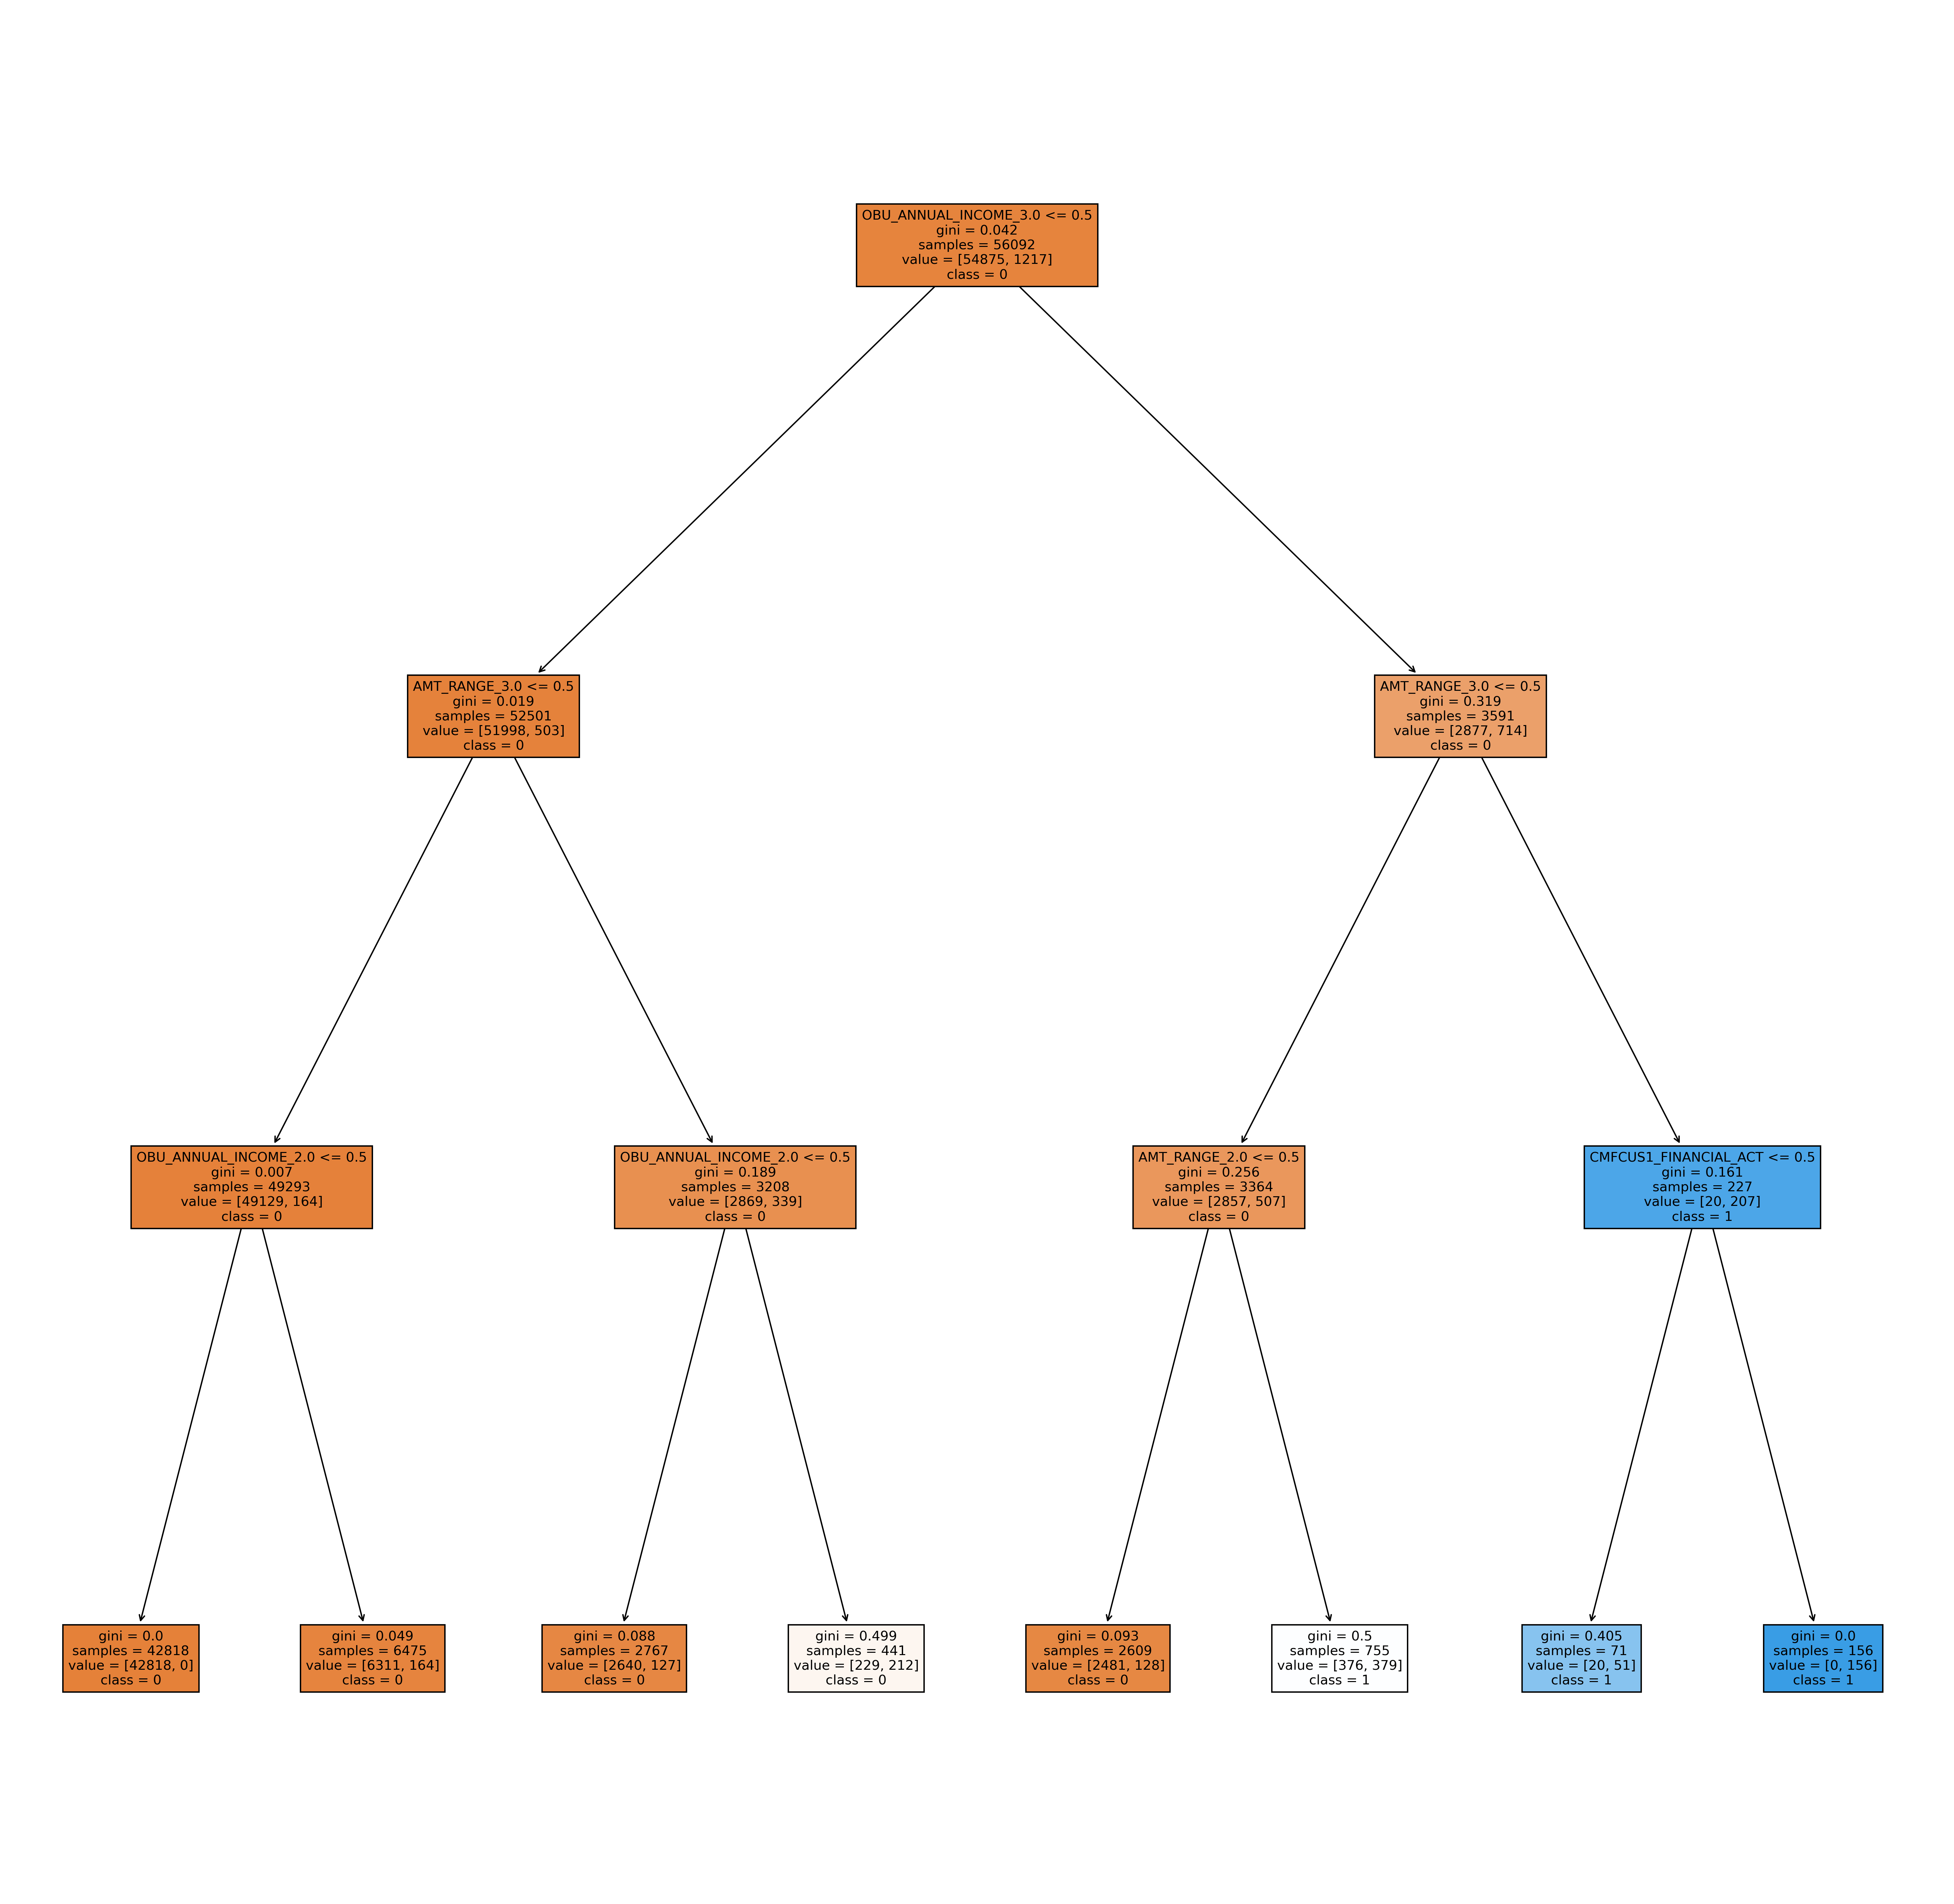

In [45]:
df = pd.read_csv("0416_CRR_df.csv")
df = df.drop(df.columns[0], axis=1)
df = df.drop(columns='NA count', axis=1)
x = df[df.columns[0:-1]]
y = df[df.columns[-1]]

from sklearn.model_selection import train_test_split
x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.3,random_state=42)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

fn = x.columns
cn = y.unique()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,25), dpi=300)
tree.plot_tree(model,feature_names = fn.astype('str'), class_names=cn.astype('str'), filled = True);
fig.savefig('tree.png')

In [46]:
y_pred = model.predict(x_test1)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[23391   175]
 [  252   222]]


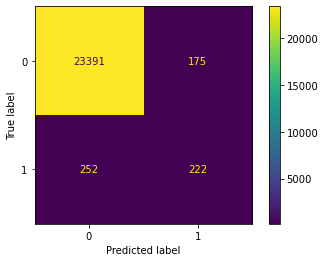

In [47]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test1, y_test)  
plt.show()

In [48]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23566
           1       0.56      0.47      0.51       474

    accuracy                           0.98     24040
   macro avg       0.77      0.73      0.75     24040
weighted avg       0.98      0.98      0.98     24040



In [25]:
# Model Trainning: Tree (Screening + Under-Resampling=NM-2)

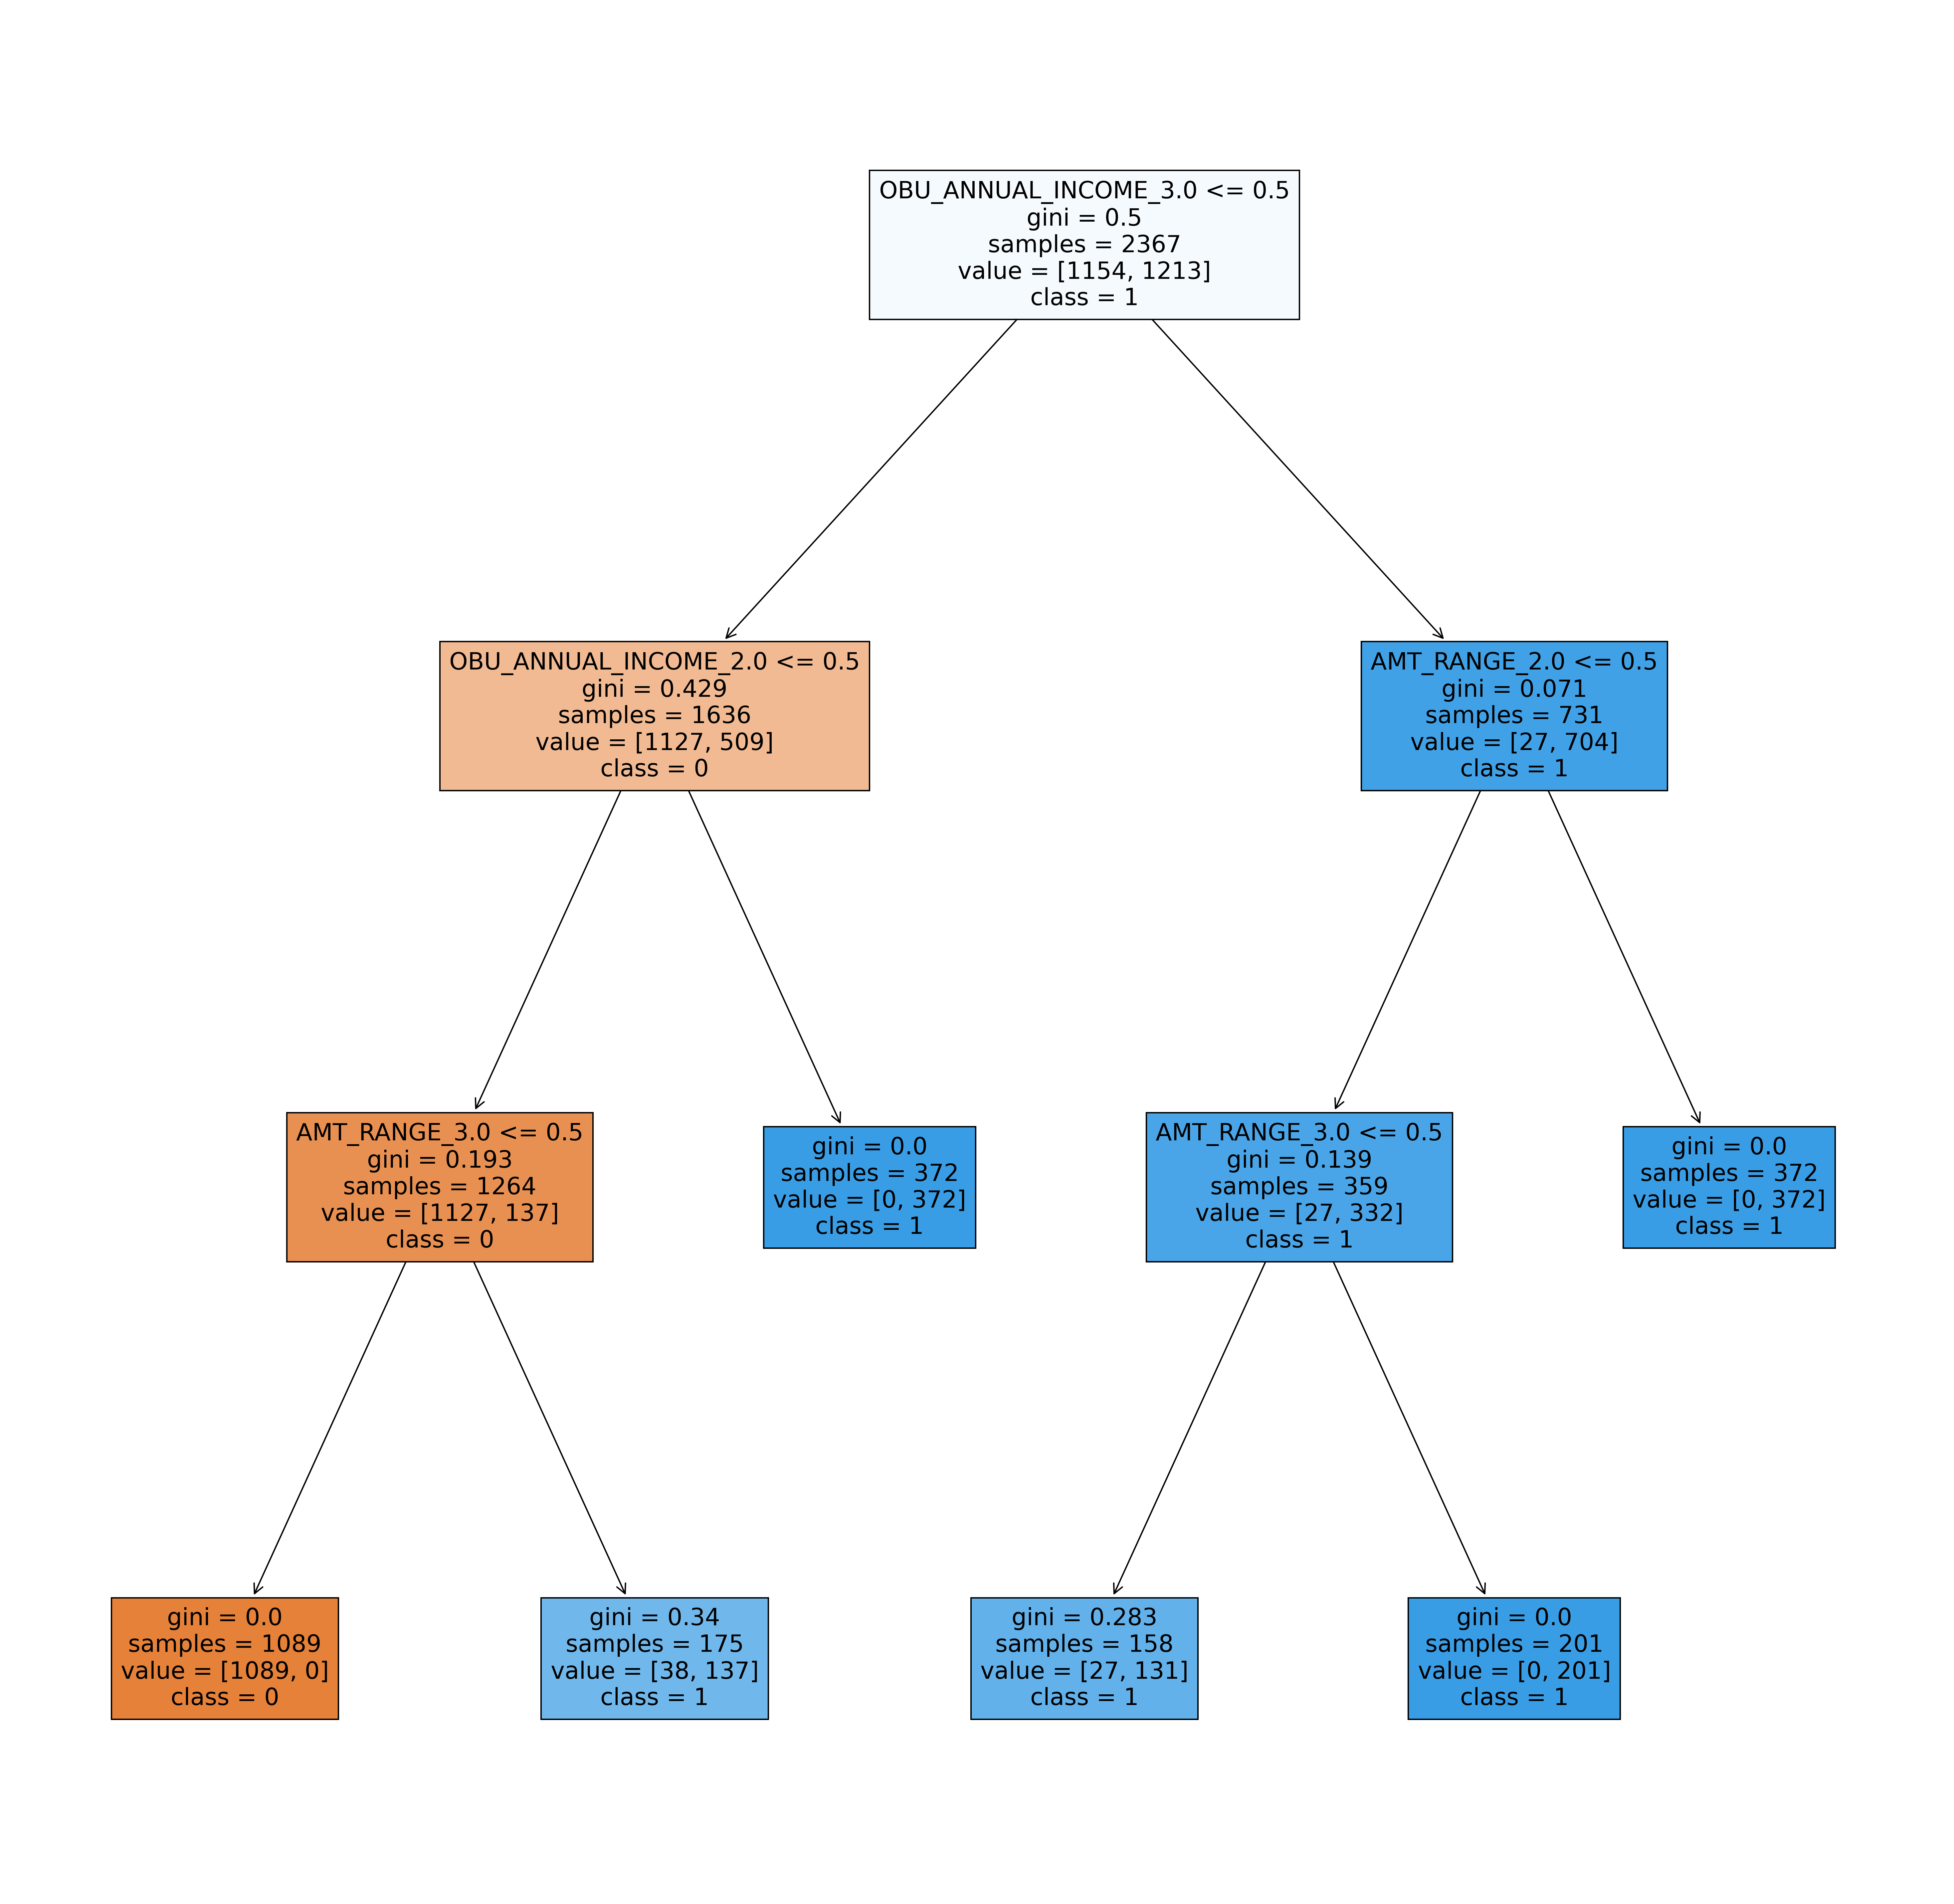

In [56]:
x = NM2_df[NM2_df.columns[0:-1]]
y = NM2_df[NM2_df.columns[-1]]

from sklearn.model_selection import train_test_split
x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.3,random_state=42)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

fn = x.columns
cn = y.unique()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,25), dpi=300)
tree.plot_tree(model,feature_names = fn.astype('str'), class_names=cn.astype('str'), filled = True);
fig.savefig('tree.png')

In [50]:
y_pred = model.predict(x_test)
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[18423  5143]
 [    0   474]]


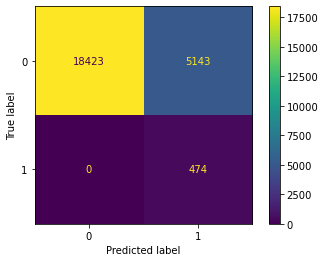

In [52]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)  
plt.show()

In [53]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88     23566
           1       0.08      1.00      0.16       474

    accuracy                           0.79     24040
   macro avg       0.54      0.89      0.52     24040
weighted avg       0.98      0.79      0.86     24040



No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.911


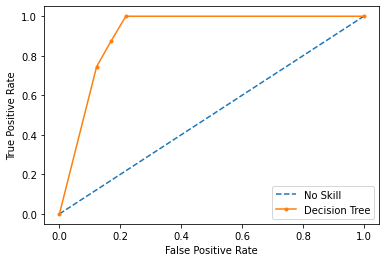

In [54]:
# ROC curve
# https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Decision Tree: f1=0.156 auc=0.437


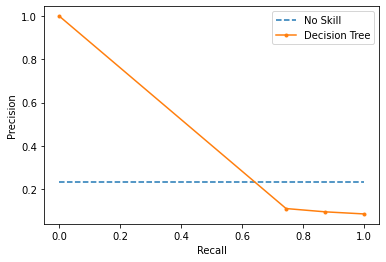

In [55]:
# PR curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Decision Tree: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_pred[y_pred==1]) / len(y_pred)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [31]:
# Model Trainning: Tree (Screening + Upper-Resampling=SMOTE)

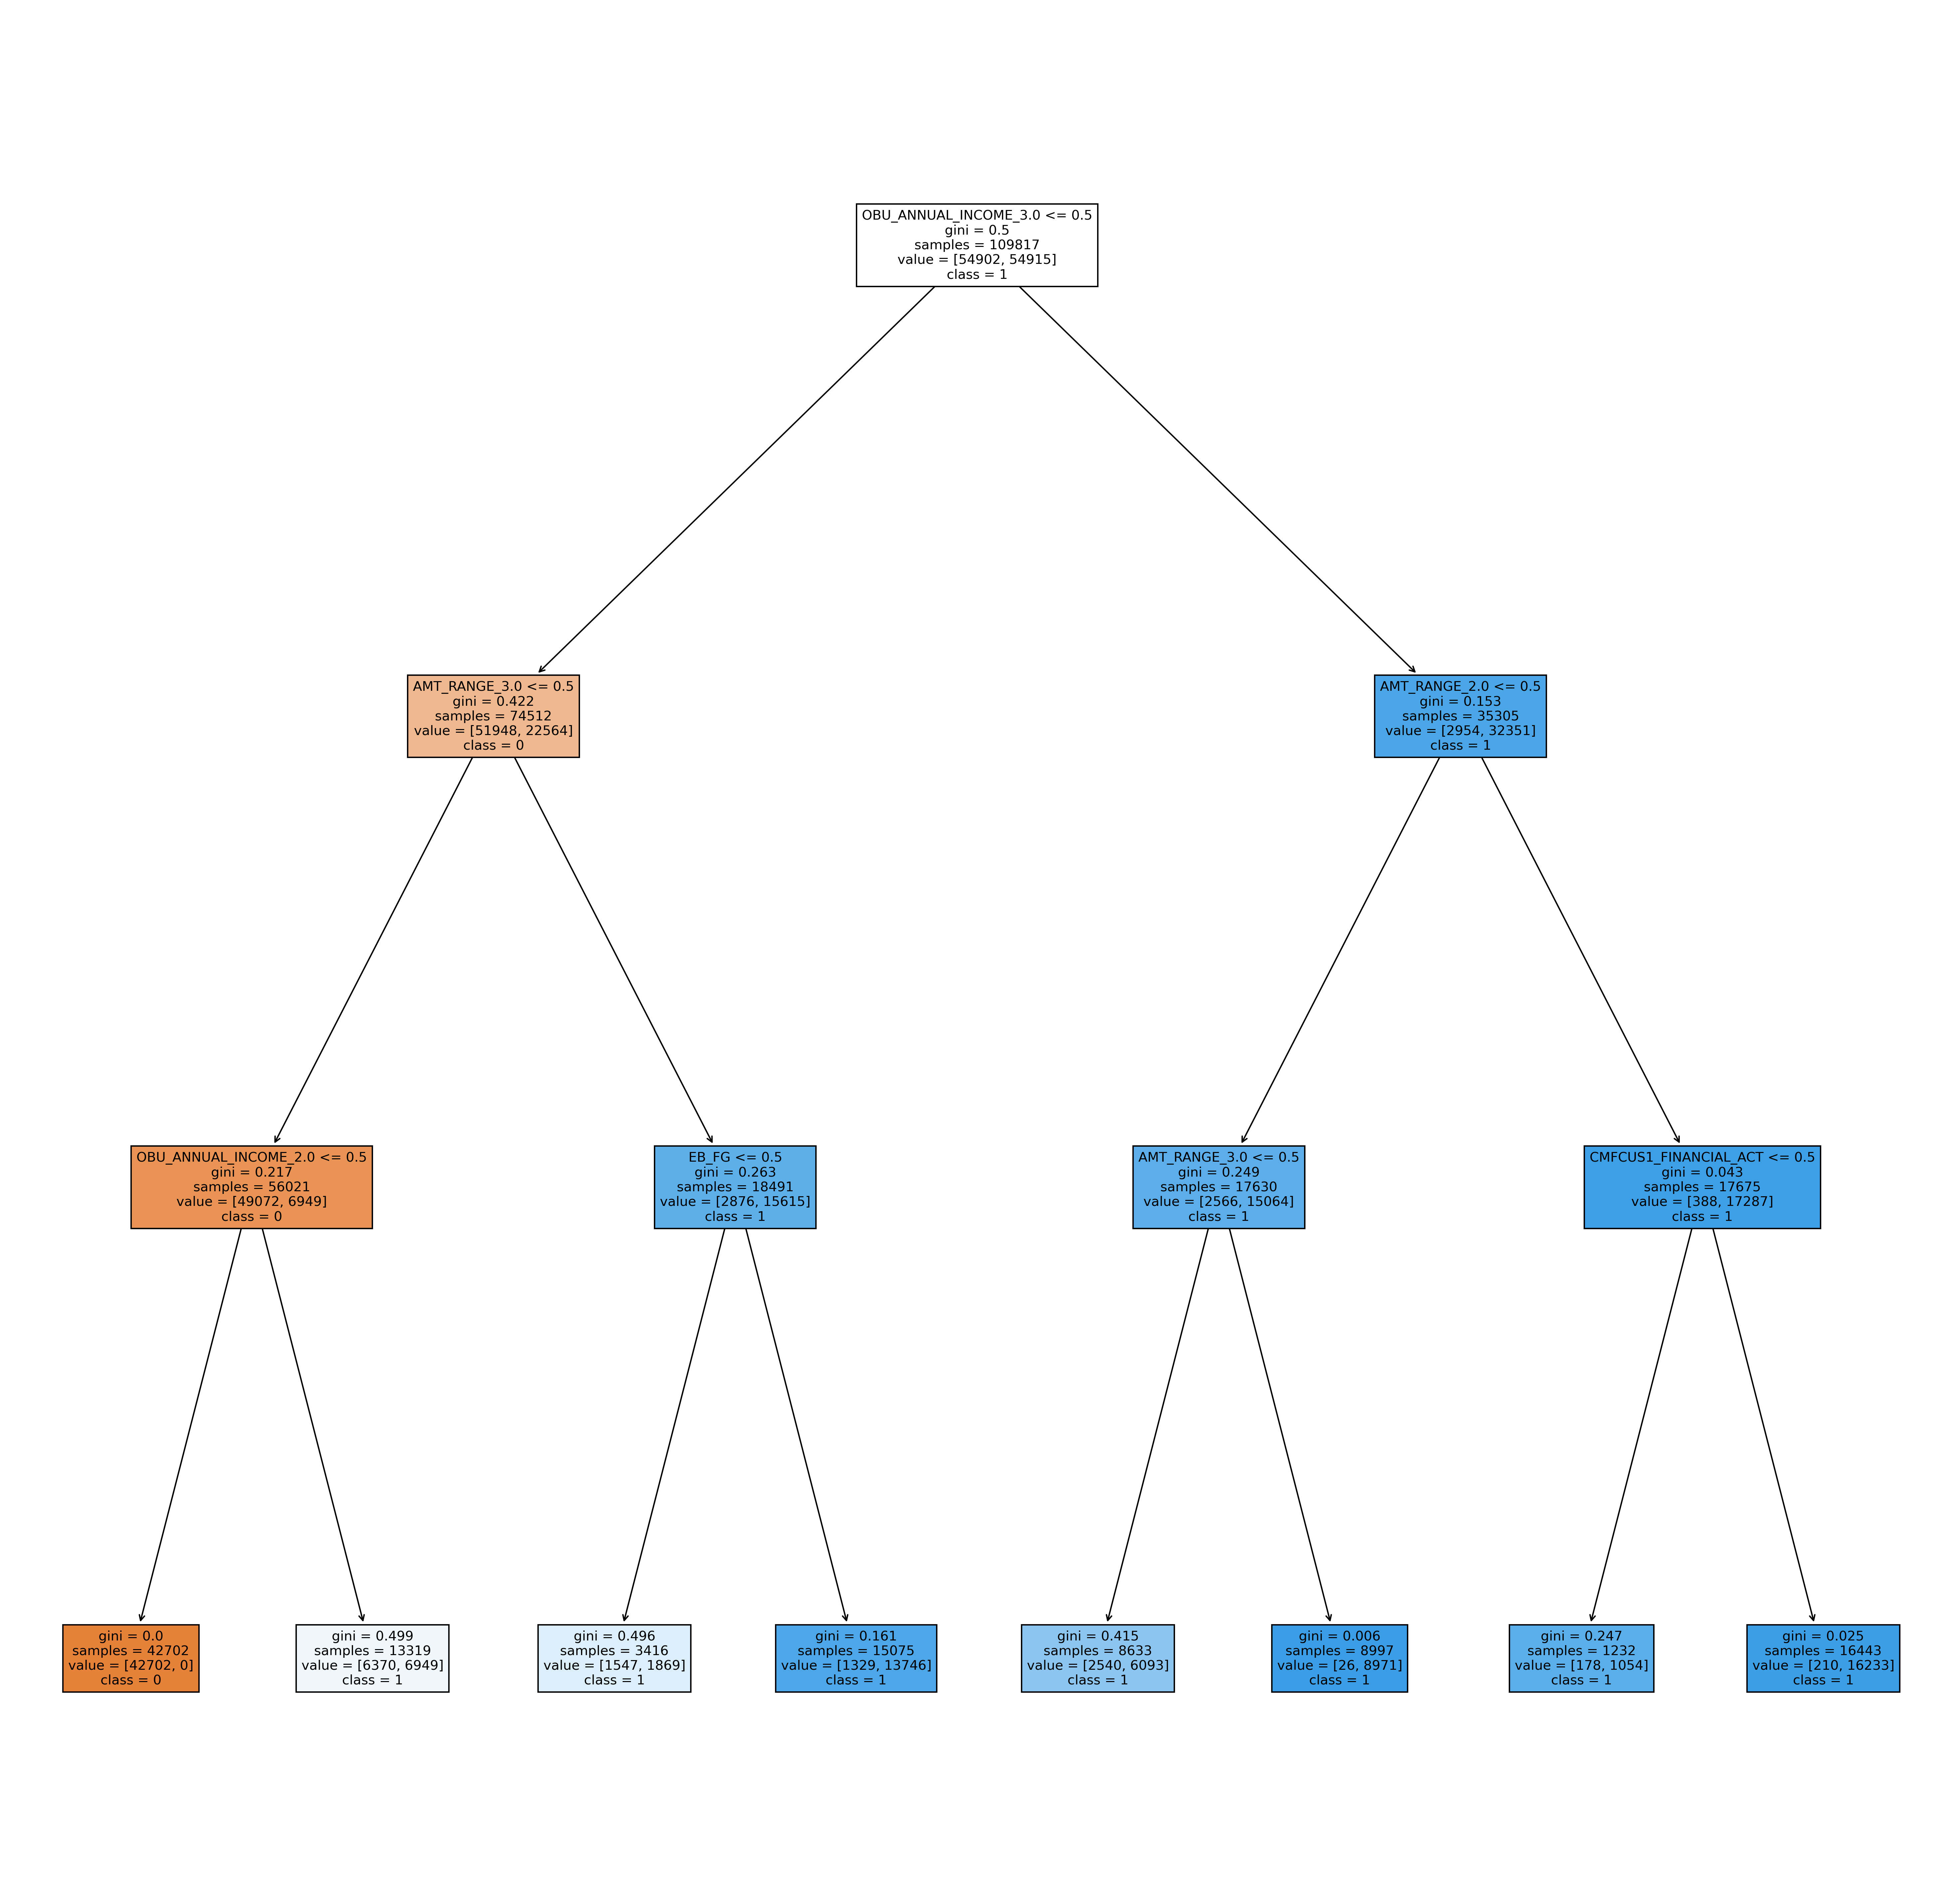

In [57]:
x = SMOTE_df[SMOTE_df.columns[0:-1]]
y = SMOTE_df[SMOTE_df.columns[-1]]

from sklearn.model_selection import train_test_split
x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.3,random_state=42)
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)

fn = x.columns
cn = y.unique()
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (25,25), dpi=300)
tree.plot_tree(model,feature_names = fn.astype('str'), class_names=cn.astype('str'), filled = True);
fig.savefig('tree.png')

In [58]:
y_pred = model.predict(x_test)
print(confusion_matrix(y_test,y_pred))

[[18423  5143]
 [    0   474]]


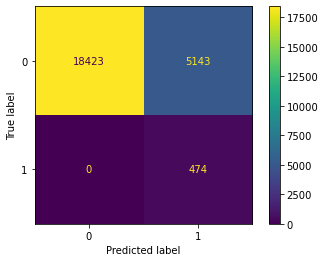

In [59]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, x_test, y_test)  
plt.show()

In [60]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88     23566
           1       0.08      1.00      0.16       474

    accuracy                           0.79     24040
   macro avg       0.54      0.89      0.52     24040
weighted avg       0.98      0.79      0.86     24040



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.968


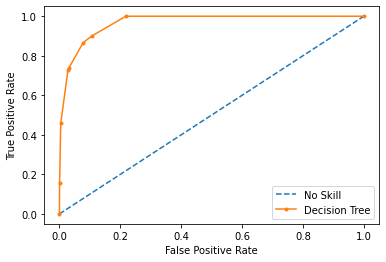

In [61]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.156 auc=0.565


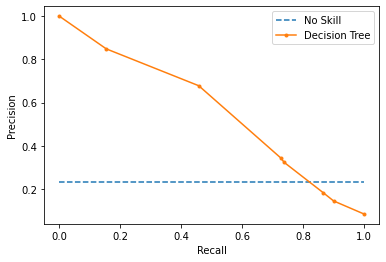

In [62]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_pred[y_pred==1]) / len(y_pred)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Decision Tree')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [37]:
# Model Trainning: Logistic (Screening + Under-Resampling=NM-2)

In [38]:
x = NM2_df[NM2_df.columns[0:-1]]
y = NM2_df[NM2_df.columns[-1]]

x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.3,random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.78      0.88     23566
           1       0.09      1.00      0.16       474

    accuracy                           0.79     24040
   macro avg       0.54      0.89      0.52     24040
weighted avg       0.98      0.79      0.87     24040



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.986


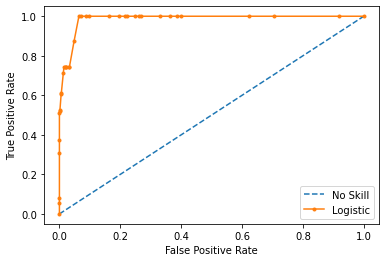

In [39]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.158 auc=0.736


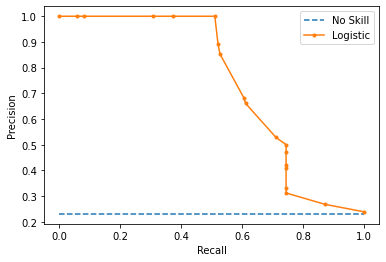

In [40]:
# PR curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_pred[y_pred==1]) / len(y_pred)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()

In [41]:
# Model Trainning: Logistic (Screening + Upper-Resampling=SMOTE)

In [42]:
x = SMOTE_df[SMOTE_df.columns[0:-1]]
y = SMOTE_df[SMOTE_df.columns[-1]]

x_train, x_test1, y_train, y_test1 = train_test_split(x, y, test_size=0.3,random_state=42)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.95      0.98     23566
           1       0.30      1.00      0.47       474

    accuracy                           0.95     24040
   macro avg       0.65      0.98      0.72     24040
weighted avg       0.99      0.95      0.97     24040



No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.990


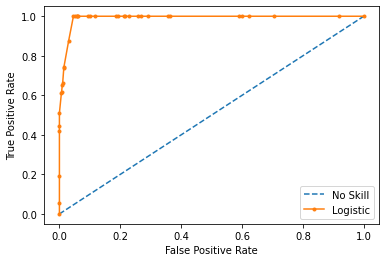

In [43]:
# ROC curve

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]
# predict probabilities
lr_probs = model.predict_proba(x_test)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

Logistic: f1=0.467 auc=0.767


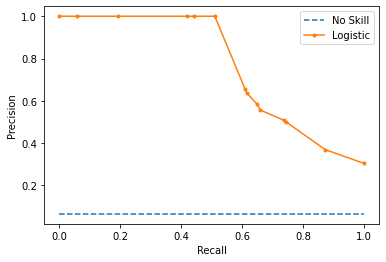

In [44]:
# PR curve

from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
lr_f1, lr_auc = f1_score(y_test, y_pred), auc(lr_recall, lr_precision)
# summarize scores
print('Logistic: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_pred[y_pred==1]) / len(y_pred)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Logistic')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()